In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import tensorflow as tf
from tensorflow import keras
import hyperopt
from hyperopt import hp
import hyperopt.pyll.stochastic as hpst
from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials
import time
import seaborn as sns
from keras.datasets import mnist

In [2]:
#cosmesi dei plot
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})

In [3]:
"""DEFINE OBJECTIVE FUNCTION"""
def objective(x):
    return {
        'loss': 0.05*(x**6 - 2*x**5 - 28*x**4 + 28*x**3 + 12*x**2 -26*x + 100),
        'status': STATUS_OK,
        'eval_time': time.time() }

x = np.linspace(-5,6,200)
y = objective(x)["loss"]

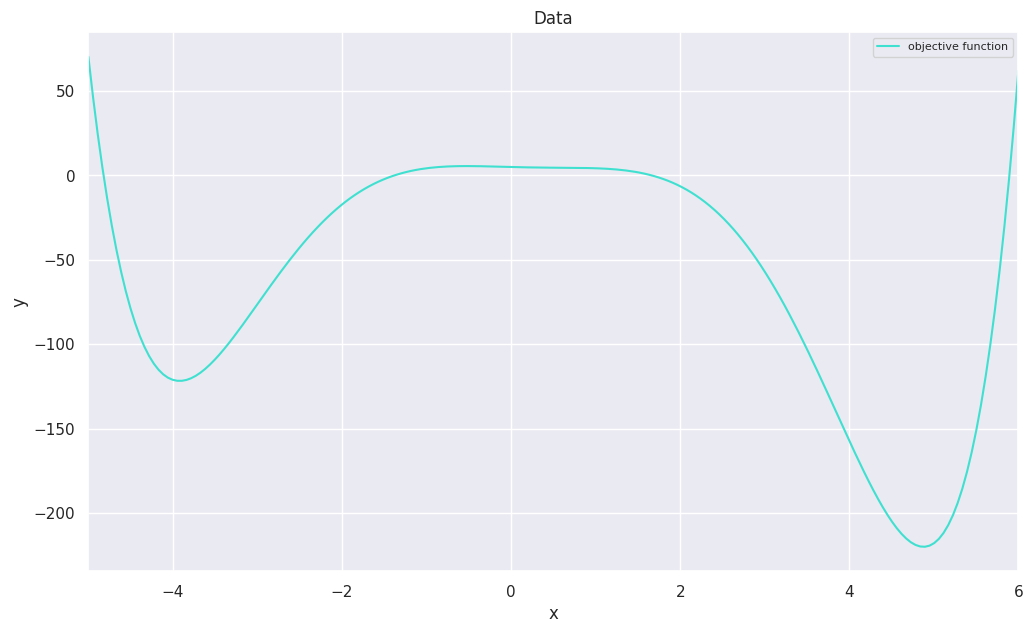

In [4]:
"""PLOT FUNCTION"""
plt.plot(x, y, color = "turquoise", label="objective function")
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,6)
plt.legend()
plt.savefig("output1a.png")
plt.show()

In [5]:
"""INITIALIZE HYPEROPT"""
#defining hyperopt space
space=hp.uniform('x', -5, 6)

In [6]:
#build a sample histogram
samples = [hpst.sample(space) for i in range(1000)]

plot=sns.histplot(samples, bins=30, color="mediumaquamarine")
plot.set_xlabel('number')
plot.set_ylabel('occurency')
plot.set_title("Esplorazione delllo spazio con hyperopt")
fig = plot.get_figure()
fig.savefig('output1b.png')

In [7]:
"""OBJECTIVE FUNCTION MINIMIZATION"""
algorithm = tpe.suggest
trials = Trials()
best = fmin(objective, space=space, algo=algorithm, max_evals=2000, trials=trials)
print(best)

{'x': 4.878687330145388}


In [8]:
trials

In [9]:
print(type(trials))

<class 'hyperopt.base.Trials'>


In [10]:
iterations = trials.idxs_vals[0]['x']
x_values = trials.idxs_vals[1]['x']

### Esercizio 2

In [11]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# dimensioni immagine di input
img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits output

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [13]:
# reshape data, it could depend on Keras backend.
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()
# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes) #la label della cifra è diventata un vettore di "bit", che potrà essere confrontata direttamente con l'output
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)

X_train shape: (60000, 784)
Y_train shape: (60000, 10, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10, 10)


In [19]:
print(img_rows*img_cols)

784


In [26]:
def create_DNN():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))    
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [27]:
def compile_model(opt):
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [28]:
model_DNN=compile_model("adam")

In [30]:
history = model_DNN.fit(X_train, Y_train,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test)
                      )

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: Shapes (32, 10, 10) and (32, 10) are incompatible

In [17]:
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(3200,) and logits.shape=(32, 10)